In [ ]:
#kütüphaneler içeri aktarılır.
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, auc

In [ ]:
# Veri kümesini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Verileri yeniden şekillendirme
img_height, img_width, num_channels = 28, 28, 1
x_train = x_train.reshape((-1, img_height, img_width, num_channels))
x_test = x_test.reshape((-1, img_height, img_width, num_channels))
#Burada veri setindeki görüntü boyutunu yeniden şeklillendirerek 4 boyutlu tensörlere dönüştürüyoruz.
#Veri setindeki her görüntü 28x28 boyutların da tek kanallı yani gridir.

In [ ]:
# Veri ön işleme (normalizasyon)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# CNN Modelini Oluşturma
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_channels)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))  # 10 sınıflı bir sınıflandırma problemi olduğu için çıktı katmanı 'softmax' olarak değiştirildi

In [ ]:
# CNN Modelini derleme
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# CNN Modelini eğitme
history = cnn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/100
1875/1875 [==============================] - 20s 4ms/step - loss: 0.1264 - accuracy: 0.9609 - val_loss: 0.0448 - val_accuracy: 0.9842
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0328 - val_accuracy: 0.9889
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0270 - val_accuracy: 0.9904
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0247 - val_accuracy: 0.9913
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0320 - val_accuracy: 0.9909
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0421 - val

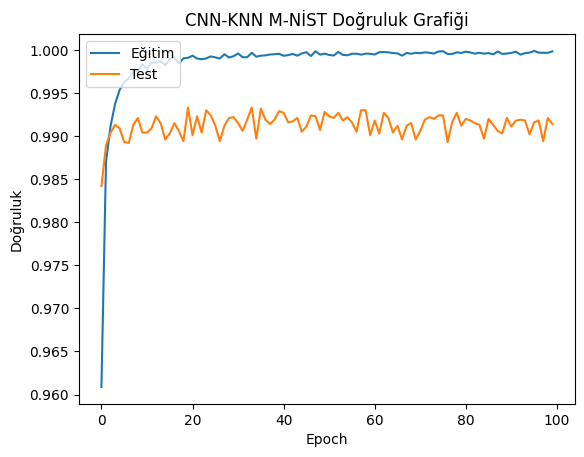

In [ ]:
# Accuracy grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-KNN M-NİST Doğruluk Grafiği')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

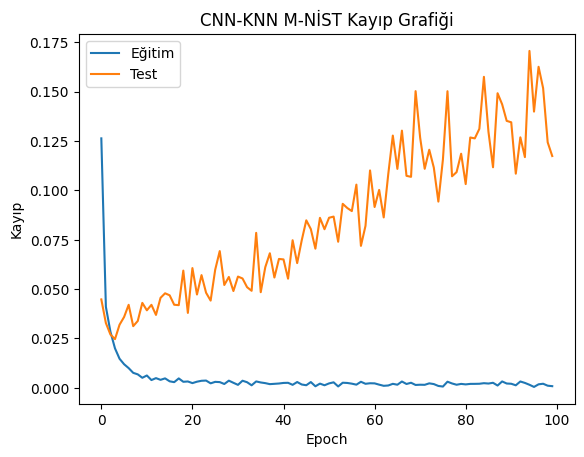

In [ ]:
# Loss grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-KNN M-NİST Kayıp Grafiği')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

In [ ]:
# CNN'nin özelliklerini çıkarın
train_features = cnn_model.predict(x_train)
test_features = cnn_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# KNN Modelini Oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, y_train)

KNeighborsClassifier()

In [ ]:
# KNN ile tahmin yapma
knn_predictions = knn_model.predict(test_features)

In [ ]:
# Eğitim veri setinde doğruluk değerini hesaplama
train_predictions = knn_model.predict(train_features)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Eğitim Veri Seti Doğruluğu:", train_accuracy)

Eğitim Veri Seti Doğruluğu: 0.9997166666666667


In [ ]:
# Test veri setinde doğruluk değerini hesaplama
test_predictions = knn_model.predict(test_features)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Veri Seti Doğruluğu:", test_accuracy)

Test Veri Seti Doğruluğu: 0.9917


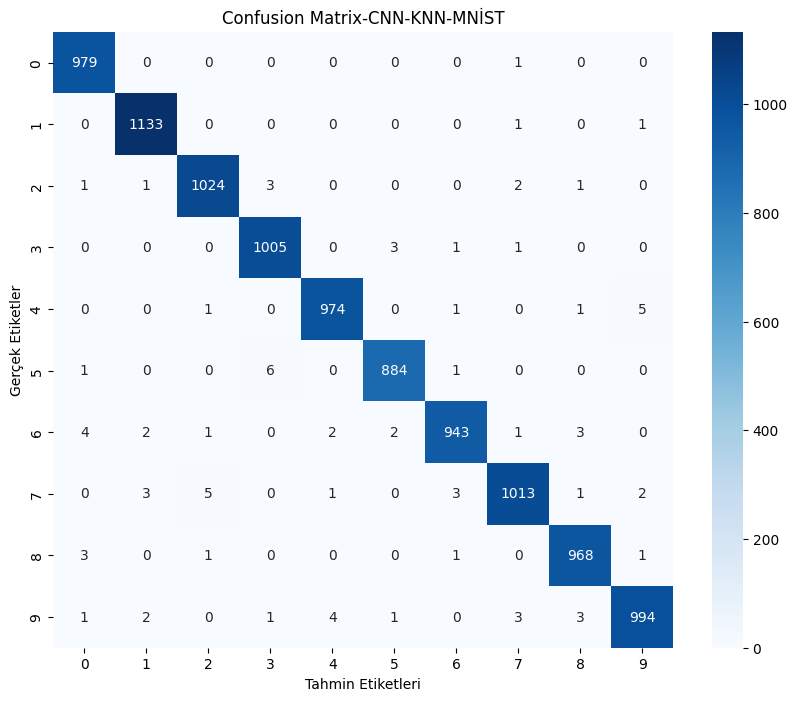

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix-CNN-KNN-MNİST')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

In [ ]:
# Sınıflandırma raporu
classification_rep = classification_report(y_test, knn_predictions)
print('Sınıflandırma Raporu:\n', classification_rep)

# Recall, precision ve f1-score değerlerini elde etme
report_lines = classification_rep.split('\n')
for line in report_lines[2:-5]:
    line_data = line.split()
    if len(line_data) >= 4:
        class_label = int(line_data[0])
        precision = float(line_data[1])
        recall = float(line_data[2])
        f1 = float(line_data[3])
        print('Sınıf:', class_label)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1-score:', f1)
        print('----------------------')

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Sınıf: 0
Precision: 0.99
Recall: 1.0
F1-score: 0.99
----------------------
Sınıf: 1
Precision: 0.99
Recall: 1.0
F1-score: 1.0
----------------------
Sınıf: 2
Precision: 0.99
Recall: 0.99
F1-score: 0.99
----------------

In [ ]:
# One-hot encoding ile çok sınıflı veriyi ikili sınıflandırmaya dönüştürme
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binary.shape[1]

# Tahmin olasılıklarını elde etme
knn_probs = knn_model.predict_proba(test_features)

# ROC eğrisi ve AUC skoru hesaplama
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], knn_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Mikro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), knn_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Makro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Sonuçları yazdırma
print('Mikro-Ortalama AUC Skoru:', roc_auc_micro)
print('Makro-Ortalama AUC Skoru:', roc_auc_macro)


Mikro-Ortalama AUC Skoru: 0.9959290277777778
Makro-Ortalama AUC Skoru: 0.995892475819334


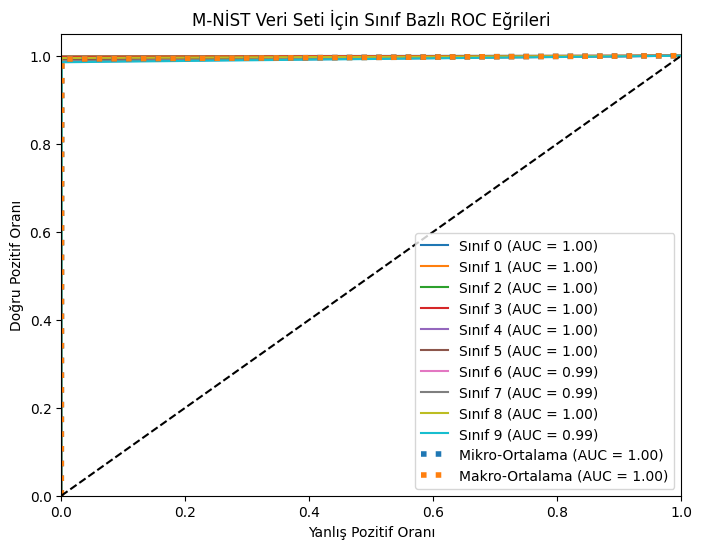

In [ ]:
# ROC eğrilerini çizme
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Sınıf %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Mikro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_micro, tpr_micro, label='Mikro-Ortalama (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

# Makro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_macro, tpr_macro, label='Makro-Ortalama (AUC = %0.2f)' % roc_auc_macro, linestyle=':', linewidth=4)

# Rastgele tahmin edilen ROC eğrisini çizme
plt.plot([0, 1], [0, 1], 'k--')

# Eksen ve başlık ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('M-NİST Veri Seti İçin Sınıf Bazlı ROC Eğrileri')
plt.legend(loc="lower right")

# Grafik gösterme
plt.show()